In [ ]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pandas matplotlib seaborn

# Sociophonetic Analysis of Trinidadian English

This project investigates the association between rhoticity (the presence of /r/ sounds) and ethnic identity among Indo-, Afro-, and Sino-Trinidadian speakers. The analysis focuses on F3 formant values as a reliable acoustic indicator of rhoticity.

Methodology & Data Cleaning
* Acoustic Measurement: Manual labeling in Praat was used to extract F3 values. 
* Data Preprocessing: Handled speakers with insufficient data for specific contexts by imputing values (filling NaNs) to maintain statistical integrity. 
* Participants: 12 native Trinidadian speakers across three ethnic groups and various socioeconomic backgrounds

--- Automated Group Averages ---
Ethnicity
Afro    1700.000
Indo    2750.834
Sino    2725.000
Name: Mean_R, dtype: float64


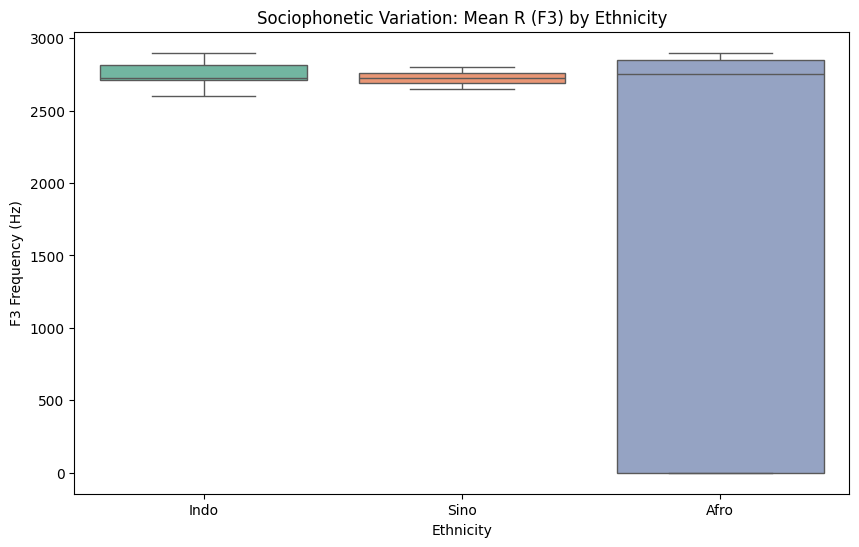

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('trinidad_data.csv')

### Data Cleaning ###
df_final = df.fillna(0)

### Grouping of Averages ###
print("--- Automated Group Averages ---")
print(df_final.groupby('Ethnicity')['Mean_R'].mean())

### Data Visualization ###
plt.figure(figsize=(10,6))
sns.boxplot(x='Ethnicity', y='Mean_R', data=df_final, hue='Ethnicity', palette='Set2', legend=False)
plt.title('Sociophonetic Variation: Mean R (F3) by Ethnicity')
plt.ylabel('F3 Frequency (Hz)')
plt.show()


## Comparative Analysis: Word Position
Following peer feedback, tokens were divided into established phonological patterns: word-medial and word-final contexts. 
* Indo-Trinidadians: Highest rate of word-final rhoticity at 35%. 
* Afro-Trinidadians: Lowest rates, showing a strong tie to vernacular identity at 5% for word-final contexts. 
* Sino-Trinidadians: Exhibited intermediate rates in word-final positions (30%).

--- Rhoticity Variation by Word Position ---
Word_Position  Word-Final  Word-Medial
Ethnicity                             
Afro                  5.0          7.0
Indo                 35.0         23.0
Sino                 30.0          0.0


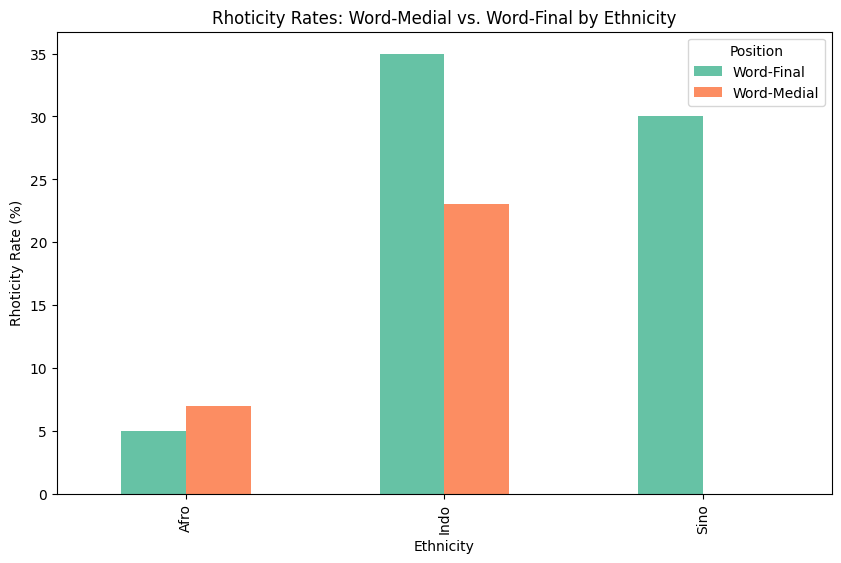

In [3]:
### Expanded dataset with word position ###
expanded_data = {
    'Ethnicity': ['Indo', 'Indo', 'Afro', 'Afro', 'Sino', 'Sino'],
    'Word_Position': ['Word-Final', 'Word-Medial', 'Word-Final', 'Word-Medial', 'Word-Final', 'Word-Medial'],
    'Rhoticity_Rate': [35, 23, 5, 7, 30, 0] # Percentages from Page 10 of paper #
}

df_detailed = pd.DataFrame(expanded_data)

### Analyzing variation based on phonological context (Word Position) ###
position_analysis = df_detailed.groupby(['Ethnicity', 'Word_Position'])['Rhoticity_Rate'].mean().unstack()

print("--- Rhoticity Variation by Word Position ---")
print(position_analysis)

### Visualization of the 'Caribbean Sociolinguistic Complex' ###
# visualization maps directly to the findings on Page 13 of paper
position_analysis.plot(kind='bar', figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Rhoticity Rates: Word-Medial vs. Word-Final by Ethnicity')
plt.ylabel('Rhoticity Rate (%)')
plt.legend(title='Position')
plt.show()